In [16]:
import sys
sys.path.append('../')
from ompl import base as ob
from ompl import geometric as og
from ompl import util as ou

from panav.environment.env import MultiTunnelEnv
from panav.viz import draw_env

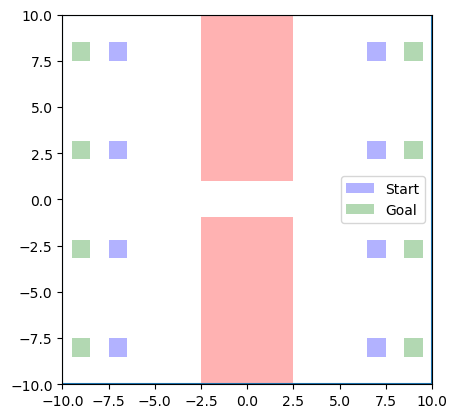

In [17]:
bloating_r = 0.5
vmax = 1.0

N = 8
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout

env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = N)
draw_env(env)

In [18]:
space_dim = 2
bounds = ob.RealVectorBounds(space_dim)

for axis in range(space_dim):
    bounds.setLow(axis,min(limits[axis]))
    bounds.setHigh(axis,max(limits[axis]))
    
space = ob.RealVectorStateSpace(space_dim)
space.setBounds(bounds)
# spaceTime = ob.SpaceTimeStateSpace(space,vmax)

In [25]:
si = ob.SpaceInformation(space)


In [99]:
import numpy as np
from panav.RRT.utils import has_line_collision
def state_to_py(s,space_dim = 2):
    return np.array([s[i] for i in range(space_dim)])

def path_to_py(path,space_dim = 2):
    vs = path.getStates()
    n_states = path.getStateCount()
    out = [state_to_py(vs[i],space_dim) for i in range(n_states)]
    return np.array(out).T

class Validator(ob.MotionValidator):
    def checkMotion(self,s1,s2):
        x1 = state_to_py(s1)
        x2 = state_to_py(s2)
        return not has_line_collision(env,x1,x2,bloating_r)

# Set the object used to check which states in the space are valid
validityChecker = Validator(si)
si.setMotionValidator(validityChecker)

si.setup()

In [100]:
# planner = og.STRRTstar(si)
planner = og.RRTstar(si)

In [101]:
space.getDimension()

2

In [104]:
# Set our robot's starting state to be the bottom-left corner of
# the environment, or (0,0).

def py_to_state(s,space):
    space_dim = len(s)
    x = ob.State(space)
    for i in range(space_dim):
        x[i] = s[i]
    return x

start = py_to_state(env.starts[0],space)
goal = py_to_state(env.goals[0],space)


# Create a problem instance
pdef = ob.ProblemDefinition(si)

# Set the start and goal states
pdef.setStartAndGoalStates(start, goal)

pdef.setOptimizationObjective(ob.PathLengthOptimizationObjective(si))

optimizingPlanner = planner

# Set the problem instance for our planner to solve
optimizingPlanner.setProblemDefinition(pdef)
optimizingPlanner.setup()

# attempt to solve the planning problem in the given runtime
solved = optimizingPlanner.solve(5)

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 25


         at line 101 in /Users/tianpengzhang/Desktop/ompl/src/ompl/base/src/Planner.cpp


TypeError: Validator.checkMotion() takes 2 positional arguments but 3 were given

In [96]:
path = pdef.getSolutionPath()
path = path_to_py(path)

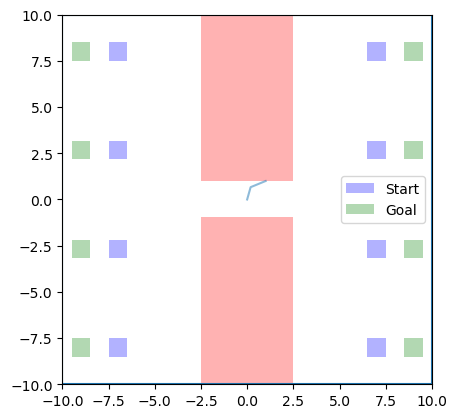

In [97]:
draw_env(env,paths = [path])
